In [1]:
import numpy as np
from numpy.ctypeslib import ndpointer
import matplotlib.pyplot as plt
import pandas as pd
import math as m
import ctypes as ct
from ipywidgets import interact, widgets, interactive
import warnings
warnings.filterwarnings('ignore')

def make_x(n, xs, xe):
    step = (xe - xs) / (n - 1)
    return np.arange(xs, xe + step, step)

def plot(x, y):
    plt.plot(x, y)
    plt.grid()
    plt.show()

array = lambda arr: np.asarray(arr, dtype=np.float32) 

lib = ct.CDLL('./lib.so')
lib.diff_solver.argtypes = [ndpointer(np.float32, flags="C_CONTIGUOUS"), ct.c_size_t, ct.c_float, ct.c_float, ct.c_float, ct.c_float, ct.c_size_t]
lib.measure_time.argtypes = [ct.c_size_t, ct.c_float, ct.c_float, ct.c_float, ct.c_float, ct.c_size_t]
lib.measure_time.restype = ct.c_double

def measure_time(size, xs, xe, a, b, iter, nproc=6):
    lib.omp_set_num_threads(ct.c_int(nproc))
    return lib.measure_time(size, xs, xe, a, b, iter)

In [2]:
N = 400
xs = 0.0
xe = 1.0
a = 1.0
lib.omp_set_num_threads(ct.c_int(4))

def draw_plot(iter, b):
    x, y = make_x(N, xs, xe), array(np.zeros(N))
    lib.diff_solver(y, N, xs, xe, a, b, iter)
    plot(x, y)

widg = interactive(draw_plot, iter=widgets.IntSlider(min=1,max=10,step=1,value=1), b=widgets.FloatSlider(min=0.0,max=2.0,step=0.05,value=0.0))
widg

interactive(children=(IntSlider(value=1, description='iter', max=10, min=1), FloatSlider(value=0.0, descriptio…

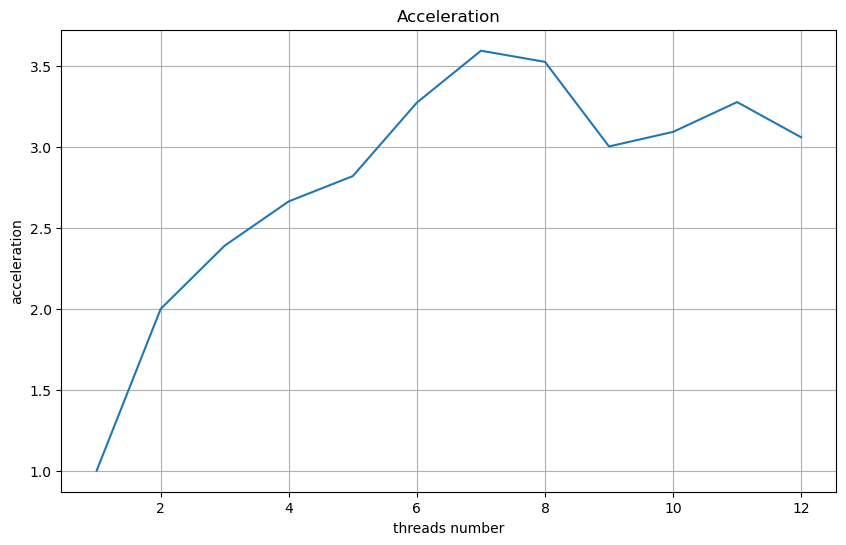

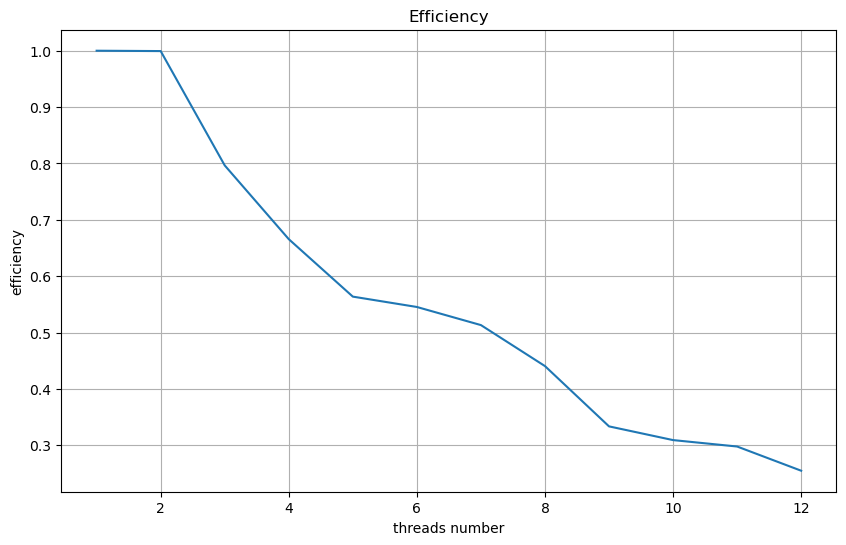

In [3]:
N = 4000
iter = 5
xs = 0.0
xe = 1.0
a = 1.0
b = 1.0

nproc = 12

fig, ax1 = plt.subplots(figsize=(10,6))
fig, ax2 = plt.subplots(figsize=(10,6))
ax1.set(xlabel='threads number', ylabel='acceleration', title='Acceleration')
ax2.set(xlabel='threads number', ylabel='efficiency', title='Efficiency')
ax1.grid(); ax2.grid()

x = np.arange(1, nproc + 1)
y = np.array([])
for n in x:
    y = np.append(y, measure_time(N, xs, xe, a, b, iter, n))

y = y[0] / y
ax1.plot(x, y)
y = y / x
ax2.plot(x, y)